DESCRIPTIVE ANALYSIS OF SUICIDE OVERVIEW(1985-2015)

INTRODUCTION : 

The suicide rate in lots of countries have been quite high for many years, including the developing and developed countries. At the begining, we'll see the suicide rate of sex, and then the age and generation. Next we'll plot the rank of suicide rate, it's clearly to understand the distribution of the suicide rate. Finally, we'll find out the key factors of high suicide rate.

PURPOSE :

The purpose of this analysis is to increase awareness about the increasing number of suicides in the world.

Importing Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats

Let's take a look at how the dataset looks

In [ ]:
df = pd.read_csv('/content/sample_data/master.csv')
print(df.head())

   country  year     sex  ...    gdp_for_year  gdp_per_capita       generation
0  Albania  1987    male  ...  2,15,66,24,900             796     Generation X
1  Albania  1987    male  ...  2,15,66,24,900             796           Silent
2  Albania  1987  female  ...  2,15,66,24,900             796     Generation X
3  Albania  1987    male  ...  2,15,66,24,900             796  G.I. Generation
4  Albania  1987    male  ...  2,15,66,24,900             796          Boomers

[5 rows x 12 columns]


Some more information about the dataset

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k_pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI_for_year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


LET'S BEGIN WITH THE DESCRIPTIVE ANALYSIS : 

Let's find a relation between the number of suicides and poputaion of a Country.

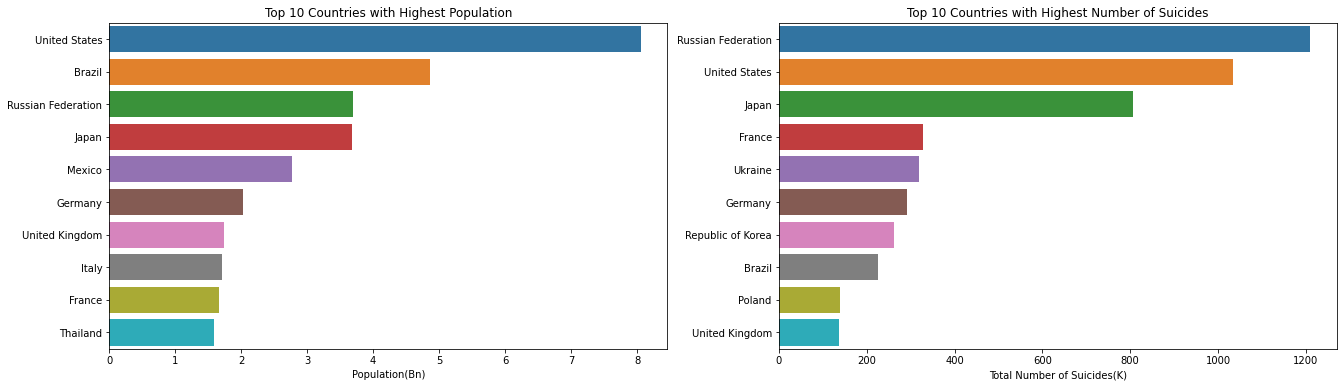

In [ ]:
country = df.groupby("country").sum().reset_index().sort_values("population",ascending=False)
country1 = df.groupby("country").sum().reset_index().sort_values("suicides_no",ascending=False)
country.population = (country.population/1000000000)
country1.suicides_no = (country1.suicides_no/1000)

plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.barplot(x="population", y="country",  data=country.iloc[:10])
plt.title("Top 10 Countries with Highest Population")
plt.ylabel("")
plt.xlabel("Population(Bn)")

plt.subplot(1,2,2)
sns.barplot(x="suicides_no", y="country",  data=country1.iloc[:10])
plt.title("Top 10 Countries with Highest Number of Suicides")
plt.ylabel("")
plt.xlabel("Total Number of Suicides(K)")
plt.show()

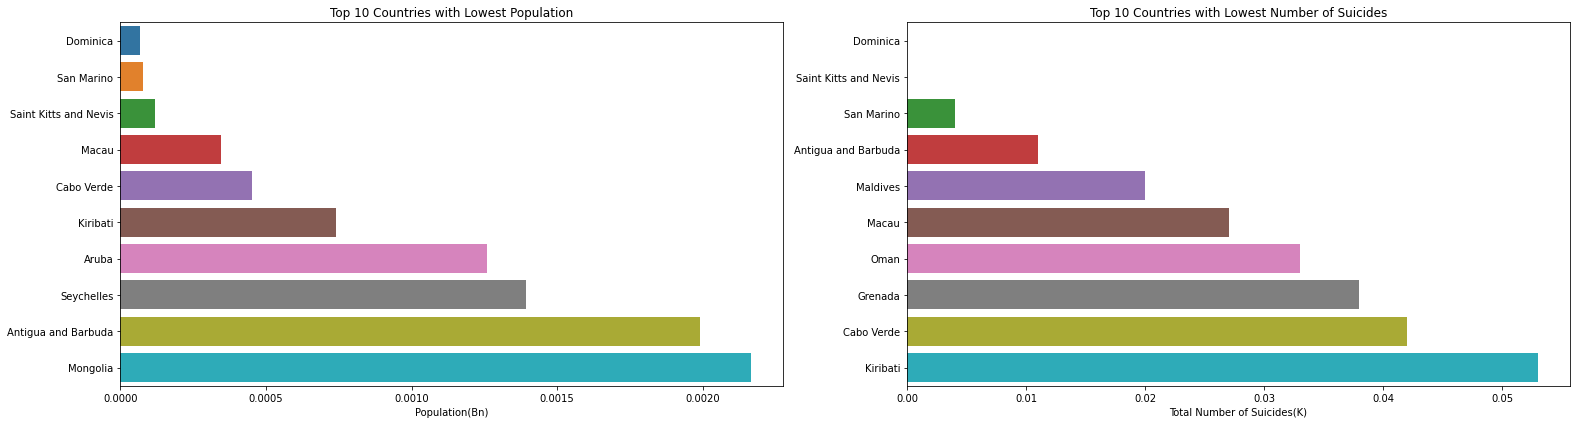

In [ ]:
country = df.groupby("country").sum().reset_index().sort_values("population",ascending=True)
country2 = df.groupby("country").sum().reset_index().sort_values("suicides_no",ascending=True)
country.population = (country.population/1000000000)
country2.suicides_no = (country2.suicides_no/1000)

plt.figure(figsize=(22,6))

plt.subplot(1,2,1)
sns.barplot(x="population", y="country",  data=country.iloc[:10])
plt.title("Top 10 Countries with Lowest Population")
plt.ylabel("")
plt.xlabel("Population(Bn)")


plt.subplot(1,2,2)
sns.barplot(x="suicides_no", y="country",  data=country2.iloc[:10])
plt.title("Top 10 Countries with Lowest Number of Suicides")
plt.ylabel("")
plt.xlabel("Total Number of Suicides(K)")
plt.tight_layout()
plt.show()

From the above Graphs it's clearly seen that the number of suicides is directly proportional to the total population of the Country.

The average suicide ratio is around 1 in every 7605 people over a period of 30 years.

Let's look at the suicide numbers by gender

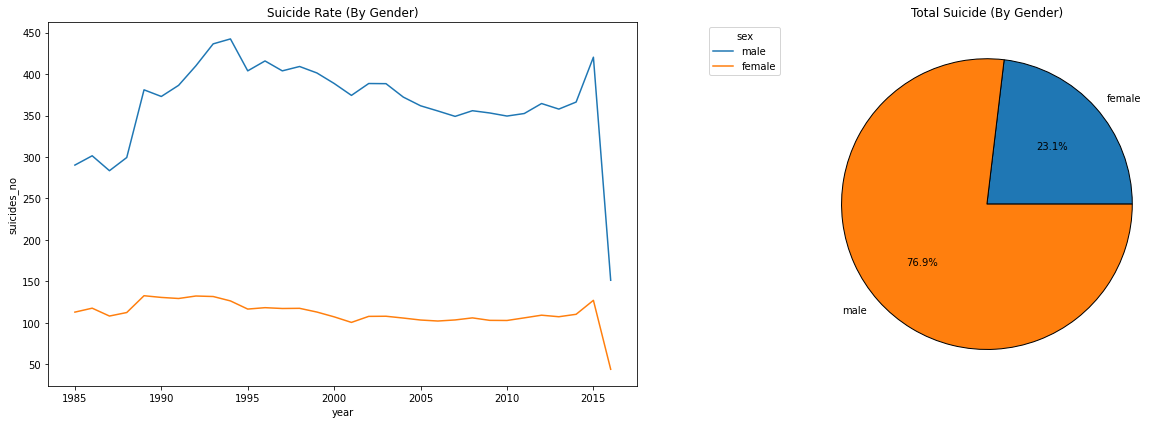

In [ ]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.lineplot(x = "year",y = "suicides_no",hue = "sex",data = df,ci = None)
plt.legend(bbox_to_anchor=(1.25,1),title = "sex")
plt.title("Suicide Rate (By Gender)")
#plt.show()

plt.subplot(1,2,2)
pie = df.groupby("sex").sum().reset_index()
slices = pie.suicides_no
labels = pie.sex
plt.pie(slices, labels=labels,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title("Total Suicide (By Gender)")
plt.tight_layout()

plt.show()

From the above graph it is very clear that the average sucide rate of men is almost 3 times that of women irrespective of the year.

allmost 77% of the sucide victims are men whereas only 23% are women.

Let's look at the different age groups and the number of suicides in each

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


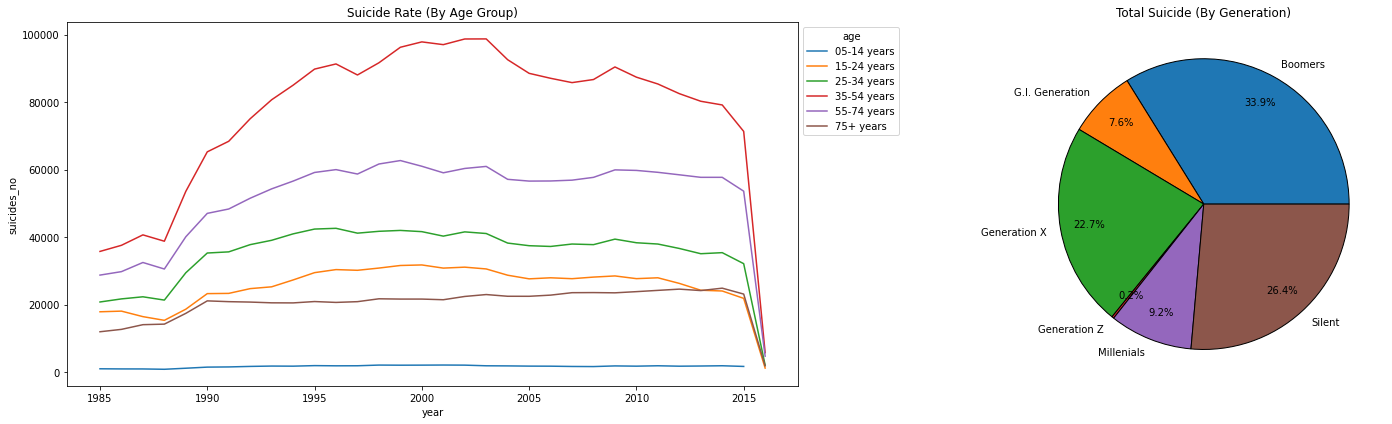

In [ ]:
df["age"] = df["age"].str.replace("5-14 years","05-14 years")
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()



plt.figure(figsize=(22,6))
plt.subplot(1,2,1)
sns.lineplot(x = "year",y = "suicides_no",hue = "age",data = df_reset,ci = None)
plt.legend(bbox_to_anchor=(1,1),title = "age")
plt.title("Suicide Rate (By Age Group)")

plt.subplot(1,2,2)
pie2 = df.groupby("generation").sum().reset_index()
slices = pie2.suicides_no
labels = pie2.generation
plt.pie(slices, labels=labels,autopct='%1.1f%%',pctdistance = 0.8,wedgeprops={'edgecolor':'black'})
plt.title("Total Suicide (By Generation)")
plt.tight_layout()

plt.show()

From the above Graph,we can conclude that the highest number of the suicides is in the age group of 35-54

Ages 35-74 make up the major part of the number of suicides.
There is almost no change in the 05-14 age group over the 30 years.


Let's find the number of suicides in every year

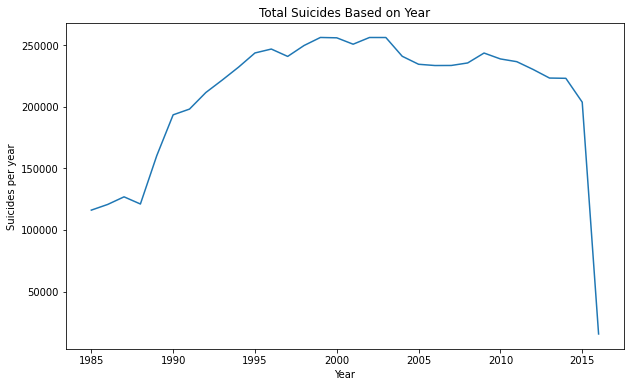

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(y="suicides_no", x="year",estimator=sum,data=df,ci = None)
plt.title("Total Suicides Based on Year")
plt.ylabel("Suicides per year")
plt.xlabel("Year")
plt.show()

From the above Graph it is seen that there is a sudden rise in suicides from 1985-1995.

1995-2005 has the maximum number of suicides.

CONCLUSION :



*   Population ,Gender and Age are the main factors of suicide rates.
*   Almost 77% of suicide victims are Males.
*   Number of suicides in a country is directly proportional to the population of the country.
*   Maximum number of suicides are in the age group of 35-74.
*   There has been a drastic in the number of suicides from 1985 - 1995.
*   suicide numbers are more or less constant from 1995 onwards.



